Face Recognition Model Accuracy: 80.98%


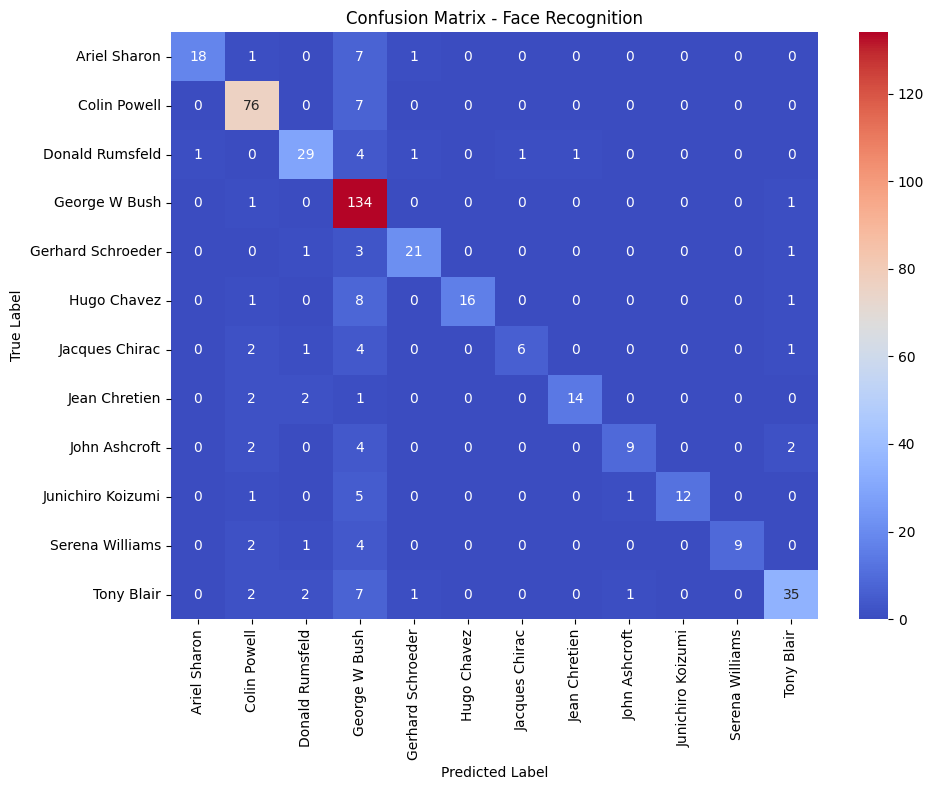

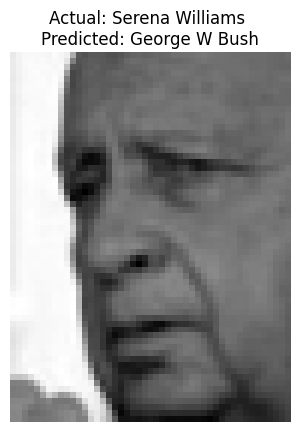

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
# 1. Load the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)  # Changed min_faces and resize
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
# 2. Preprocess Data
23
n_samples, h, w = X.shape
X = X.reshape(n_samples, h * w)
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 3. Apply PCA (Principal Component Analysis)
n_components = 100  # Reduce features to 100 components
pca = PCA(n_components=n_components, whiten=True, random_state=123)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 4. Train SVM Classifier
svm_classifier = SVC(kernel="rbf", class_weight="balanced", probability=True, C=5.0,
gamma='scale')
svm_classifier.fit(X_train_pca, y_train)
# 5. Test the Model
y_pred = svm_classifier.predict(X_test_pca)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Face Recognition Model Accuracy: {accuracy * 100:.2f}%")
# 6. Visualizations
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=target_names,
yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Face Recognition")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Test with a Sample Image
sample_idx = 10  # Pick a different sample
plt.imshow(lfw_people.images[sample_idx], cmap="gray")
plt.title(f"Actual: {target_names[y_test[sample_idx]]} \nPredicted: {target_names[y_pred[sample_idx]]}")
plt.axis("off")
plt.show()